### CIA Country Analysis and Clustering

In [1]:
import numpy as mp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings 
import os

In [3]:
warnings.simplefilter(action= "ignore", category= FutureWarning)
os.environ["OMP_NUM_THREADS"] = "1"

### DATA

All these data sets are made up of data from the US government. https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html

In [4]:
df = pd.read_csv("../DATA/CIA_Country_Facts.csv")

In [5]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

### Visualizations

<Axes: xlabel='Population', ylabel='Count'>

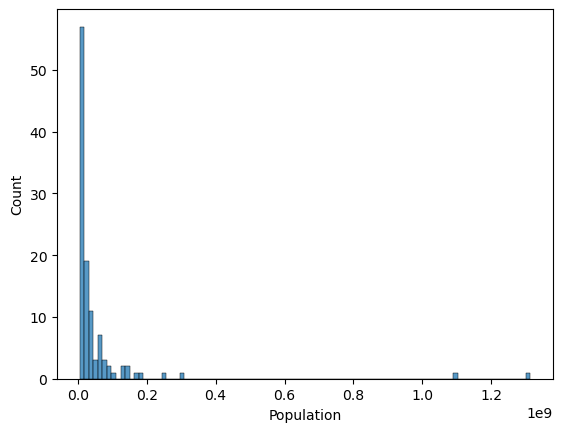

In [7]:
sns.histplot(data = df[df["Population"] > 5000000], x= "Population")

<Axes: xlabel='Region', ylabel='GDP ($ per capita)'>

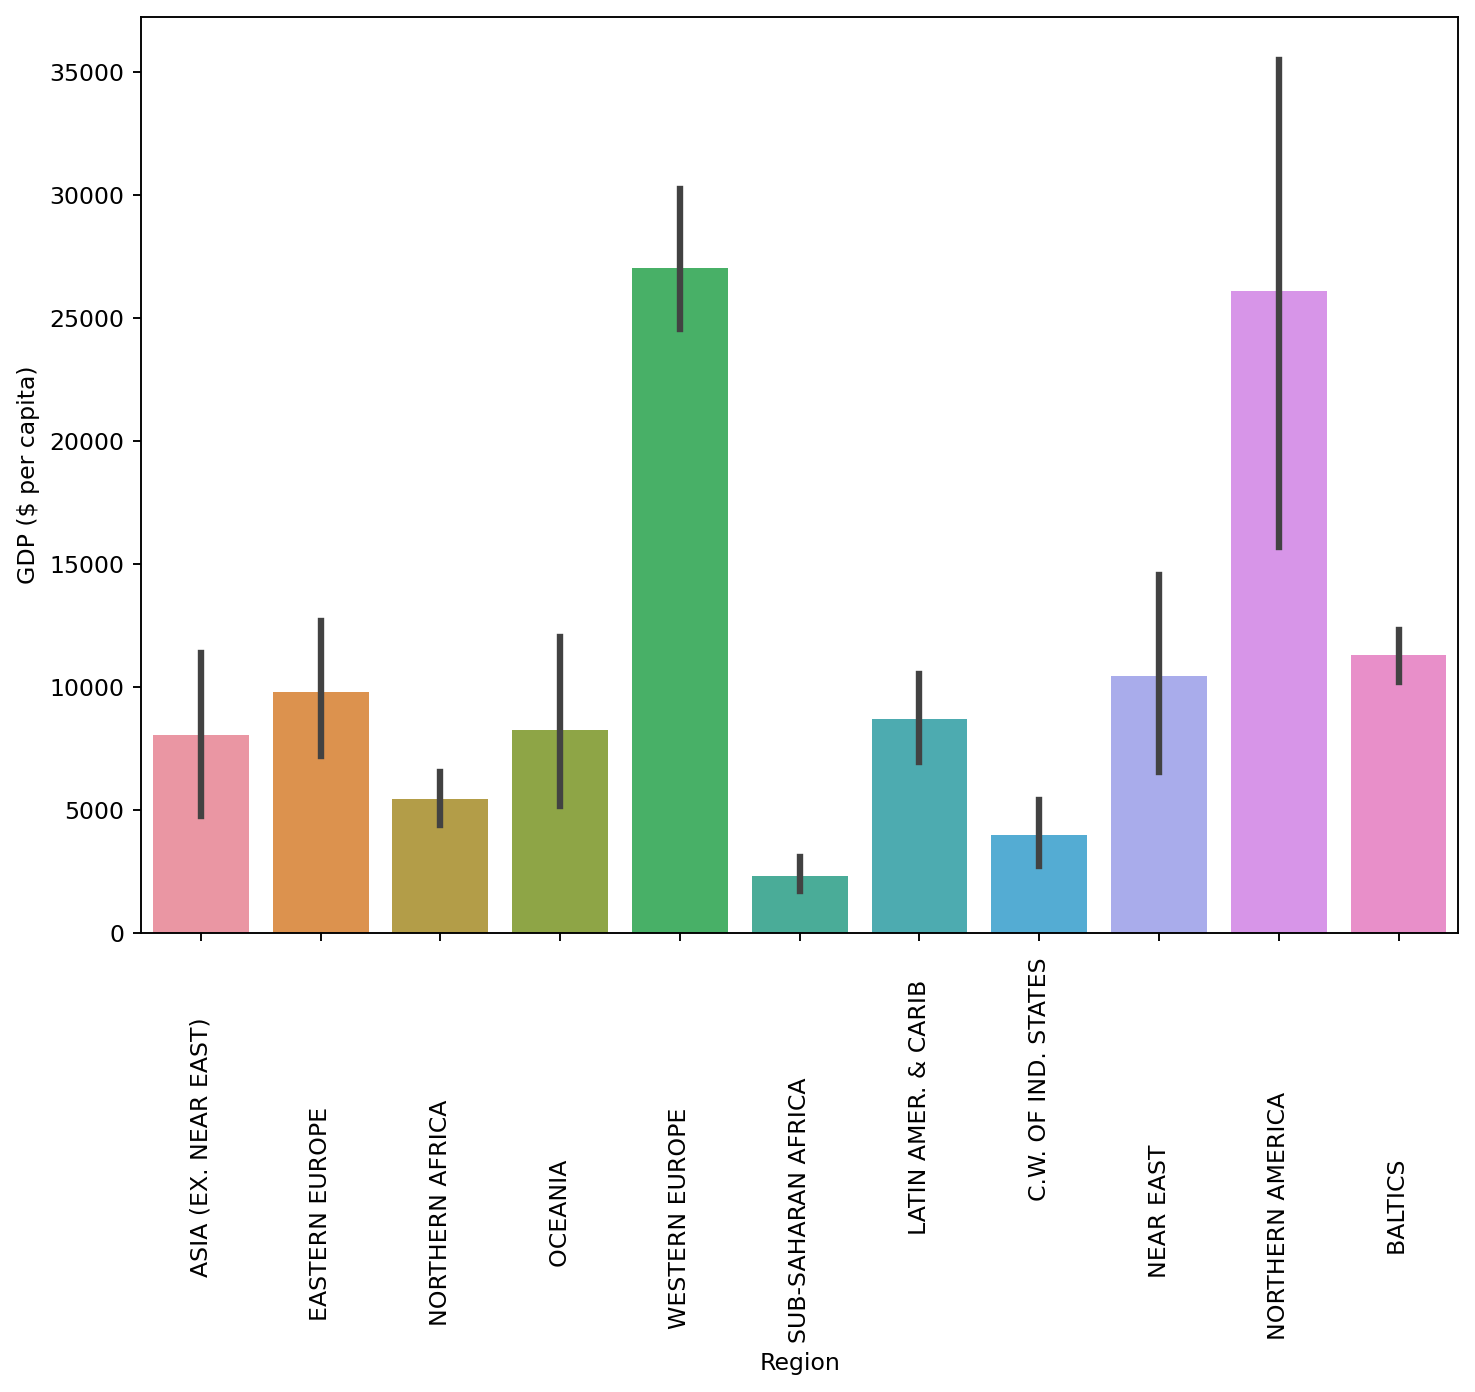

In [8]:
plt.figure(figsize = (10,7), dpi = 170)
plt.xticks(rotation = 90);
sns.barplot(data = df, x = "Region", y = "GDP ($ per capita)")

<Axes: xlabel='GDP ($ per capita)', ylabel='Phones (per 1000)'>

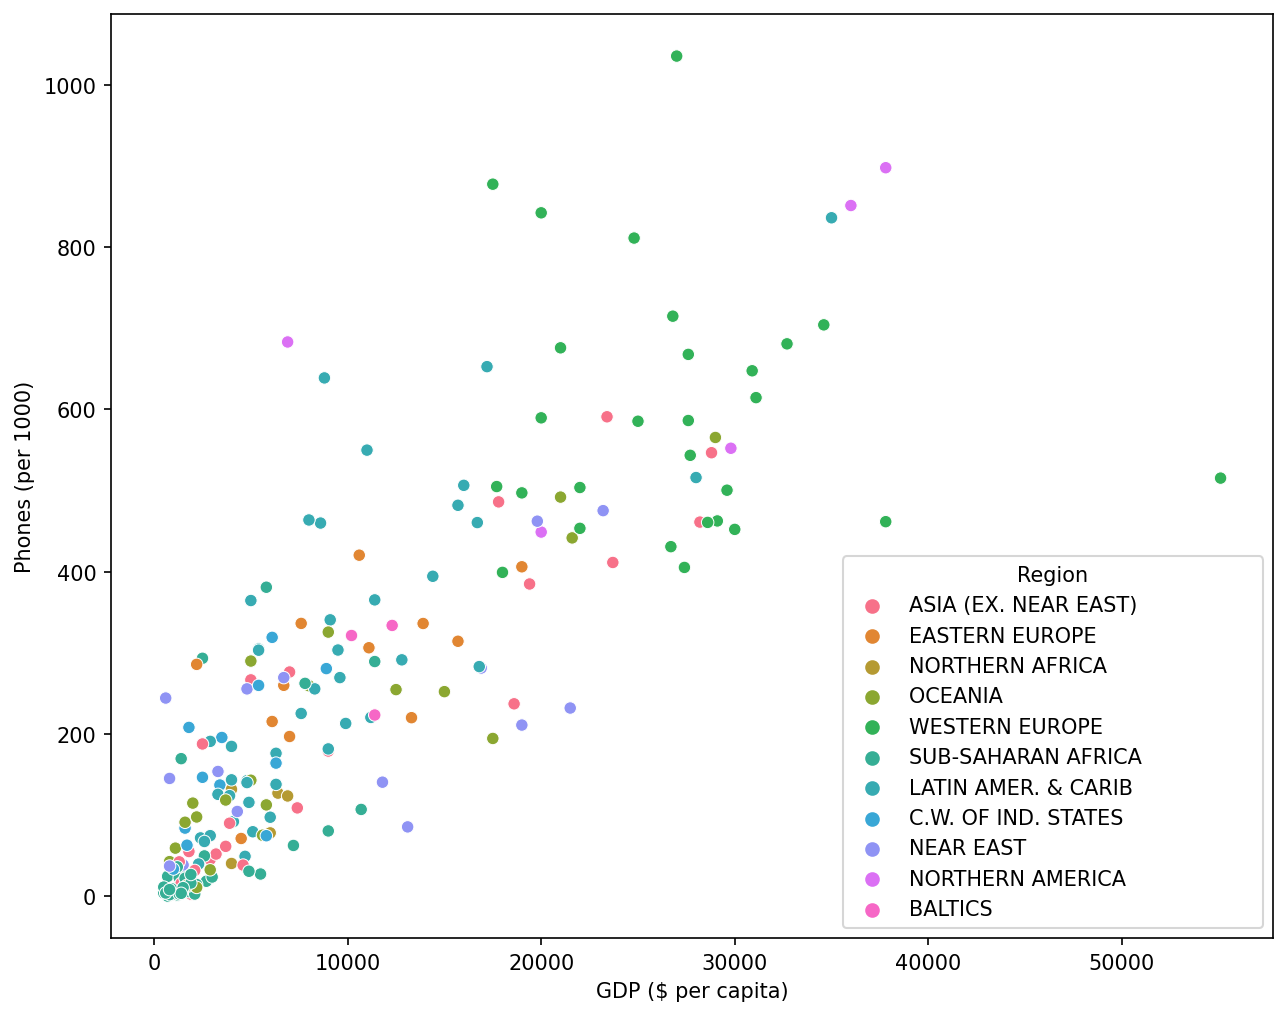

In [9]:
plt.figure(figsize=(10, 8),dpi = 150)
sns.scatterplot(data = df, x = "GDP ($ per capita)", y = "Phones (per 1000)", hue = "Region",)

<Axes: xlabel='GDP ($ per capita)', ylabel='Literacy (%)'>

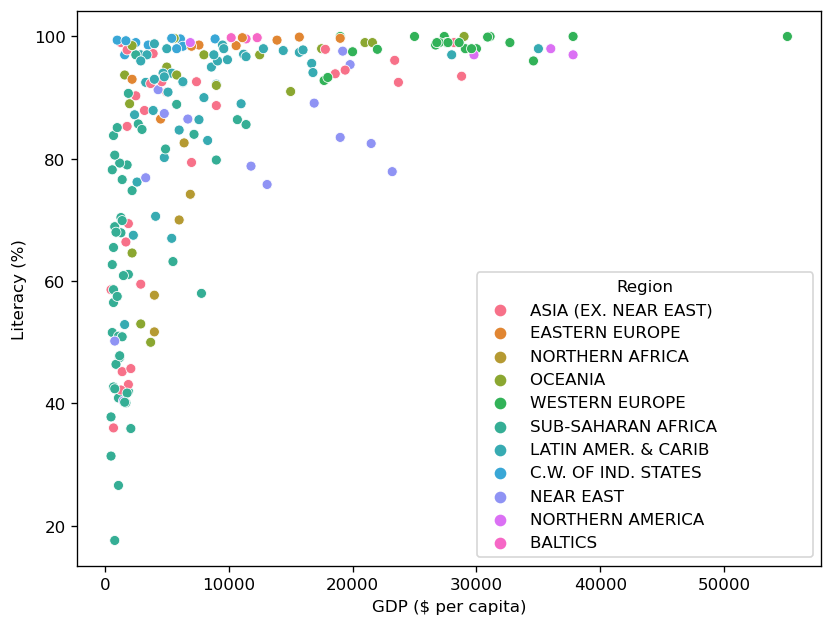

In [10]:
plt.figure(figsize=(8,6),dpi = 120)
sns.scatterplot(data = df, x = "GDP ($ per capita)", y = "Literacy (%)", hue = "Region",)

<Axes: >

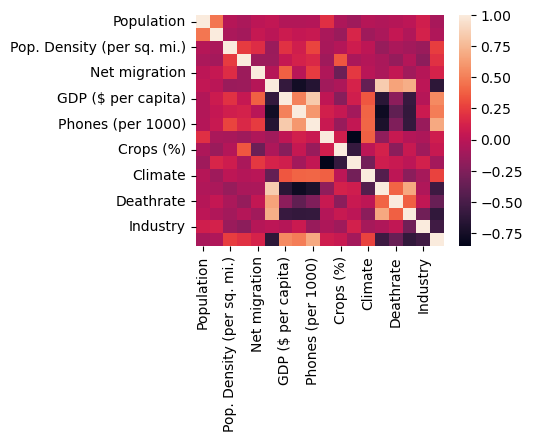

In [11]:
plt.figure(figsize=(4,3))
sns.heatmap(data = df.corr(numeric_only= True))

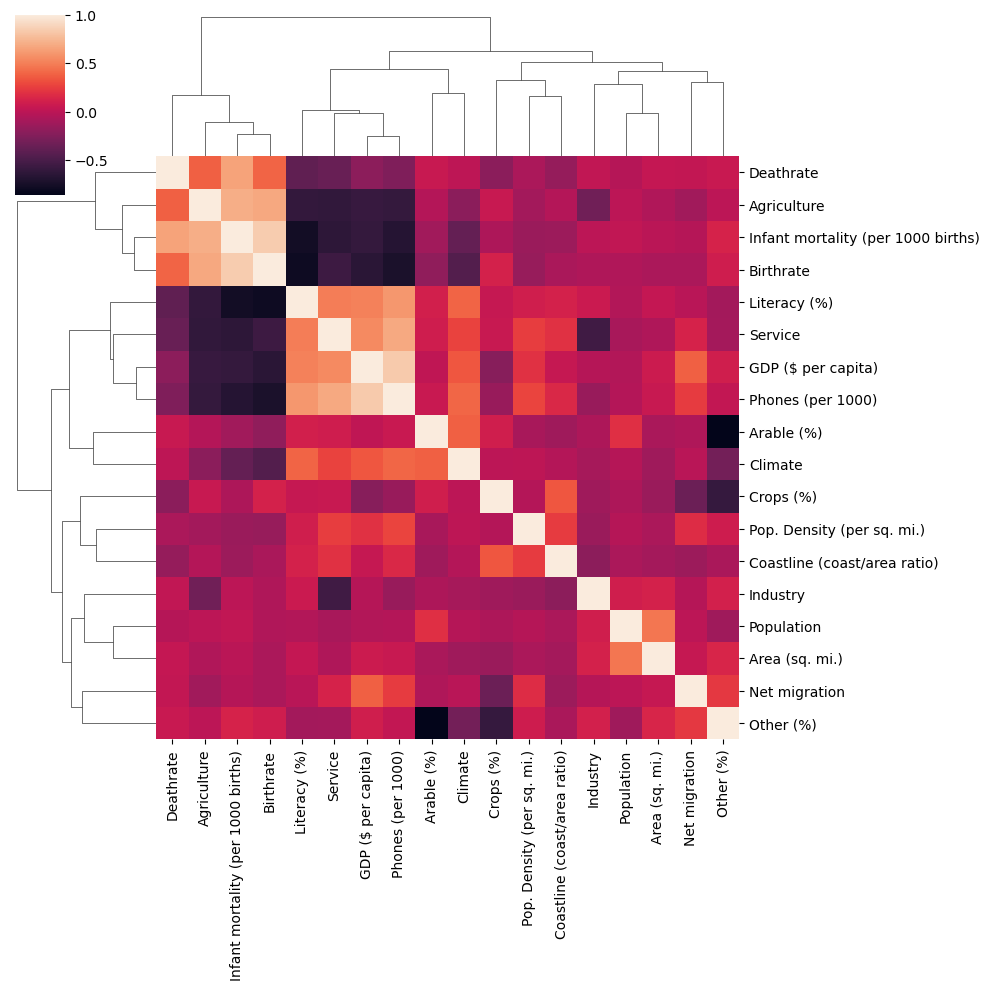

In [12]:
sns.clustermap(data = df.corr(numeric_only= True))

### DATA Refining

In [13]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [14]:
df[df["Agriculture"].isnull()]["Country"]

3            American Samoa
4                   Andorra
78                Gibraltar
80                Greenland
83                     Guam
134                 Mayotte
140              Montserrat
144                   Nauru
153      N. Mariana Islands
171            Saint Helena
174    St Pierre & Miquelon
177              San Marino
208       Turks & Caicos Is
221       Wallis and Futuna
223          Western Sahara
Name: Country, dtype: object

Most of these coutries are comprised of islands, so its a reasonable assumption to set them to zero

In [15]:
df["Agriculture"] = df["Agriculture"].fillna(0)

In [16]:
# Filling in the mean value of the region for the countries with missing climate
df["Climate"] = df.groupby("Region")["Climate"].transform(lambda x : x.fillna(x.mean()))

In [17]:
df["Literacy (%)"] = df.groupby("Region")["Literacy (%)"].transform(lambda x : x.fillna(x.mean()))

In [18]:
df = df.dropna()

In [19]:
df.isnull().sum().sum()  # no NaN values now

0

## Scikit learn imports

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

ModuleNotFoundError: No module named 'threadpoolctl'

### Data Preprocessing

Since country is a unique identifier its best to drop it

In [ ]:
X_ = df.drop("Country", axis = 1) 

In [ ]:
X = pd.get_dummies(X_, dtype=int)

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_X = scaler.fit_transform(X)

#### Looping over multiple values of K to find a reasonable value

In [ ]:
SSD = []

for k in range(2,30):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    
    SSD.append(model.inertia_)

In [ ]:
plt.figure(figsize = (8,4), dpi = 120)
plt.plot(range(2,30), SSD, "o--", markersize = 3, mfc = "red", mec = "red")

In [ ]:
pd.Series(SSD).diff().plot(kind = "bar")

In [ ]:
Model = KMeans(n_clusters=5)

In [ ]:
Model.fit(scaled_X)

In [ ]:
X["label"] = Model.predict(scaled_X)

#### Top 10 features that contribute to clustering are as follows

In [ ]:
X.corr()["label"].sort_values()[:5]    # negetive correlation

In [ ]:
X.corr()["label"].sort_values()[-5:]   # postive correlation

# Final Visualization

In [ ]:
import plotly.express as px

In [ ]:
iso = pd.read_csv("../DATA/country_iso_codes.csv")

In [ ]:
iso["label"] = X["label"]

In [ ]:
iso["label"].value_counts()

In [ ]:
dff = px.data.gapminder().query("year==2007")
fig = px.choropleth(dff, locations=iso["ISO Code"],
                    color=iso["label"], # lifeExp is a column of gapminder
                    hover_name=iso["Country"], # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()